In [1]:
__imp

Libraries have been loaded


## Load Additional Libraries

In [2]:
import multiprocessing as mp

basepath = os.path.expanduser('../')

## Load Data

In [3]:
%%time

app_train  = pd.read_feather(os.path.join(basepath, 'data/processed/application_train.feather'))
app_test   = pd.read_feather(os.path.join(basepath, 'data/processed/application_test.feather'))

bureau     = pd.read_feather(os.path.join(basepath, 'data/processed/bureau.feather'))
bureau_bal = pd.read_feather(os.path.join(basepath, 'data/processed/bureau_balance.feather'))

prev_app  = pd.read_pickle(os.path.join(basepath, 'data/processed/prev_app.pkl'))
# pos_cash  = pd.read_pickle(os.path.join(basepath, 'data/processed/pos_cash.pkl'))

CPU times: user 244 ms, sys: 240 ms, total: 484 ms
Wall time: 486 ms


In [4]:
# select numerical features
float_cols = app_train.select_dtypes(include=['float32']).columns.tolist()

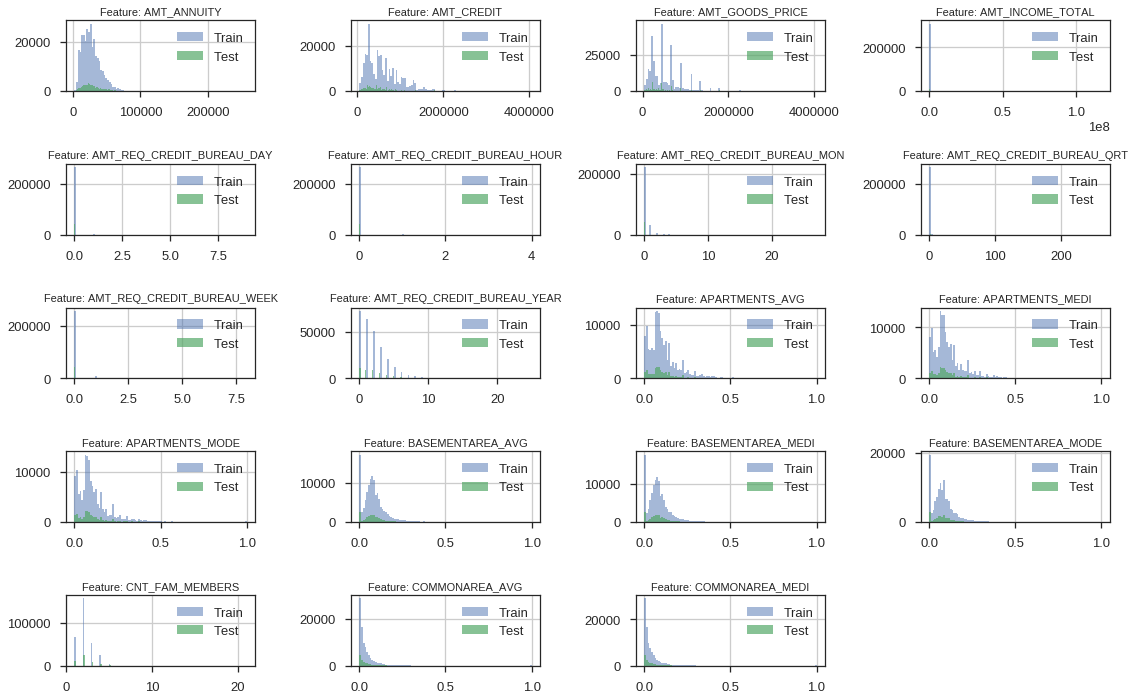

In [37]:
# concat train and test
data = pd.concat((app_train, app_test))

plt.figure(figsize=(16, 10))

for i in range(1, 20):
    plt.subplot(5, 4, i)
    
    mask = (data.TARGET.notnull())
    data.loc[mask, float_cols[i-1]].hist(bins=100, alpha=.5, label='Train')
    data.loc[~mask, float_cols[i-1]].hist(bins=100, alpha=.7, label='Test')    
    
    plt.title('Feature: {}'.format(float_cols[i - 1]), fontsize=11)
    plt.legend(loc='best')
    
plt.tight_layout();

In [41]:
# AMT_INCOME_TOTAL
app_train.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687391e+05
std      2.371759e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

75% of the values are less than 2,02,500.

In [42]:
app_test.AMT_INCOME_TOTAL.describe()

count    4.874400e+04
mean     1.784545e+05
std      1.015237e+05
min      2.694150e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      4.410000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In test set maximum possible income value is 44,10,000.

### EDA

#### Floating point valued features ( Train, Test )

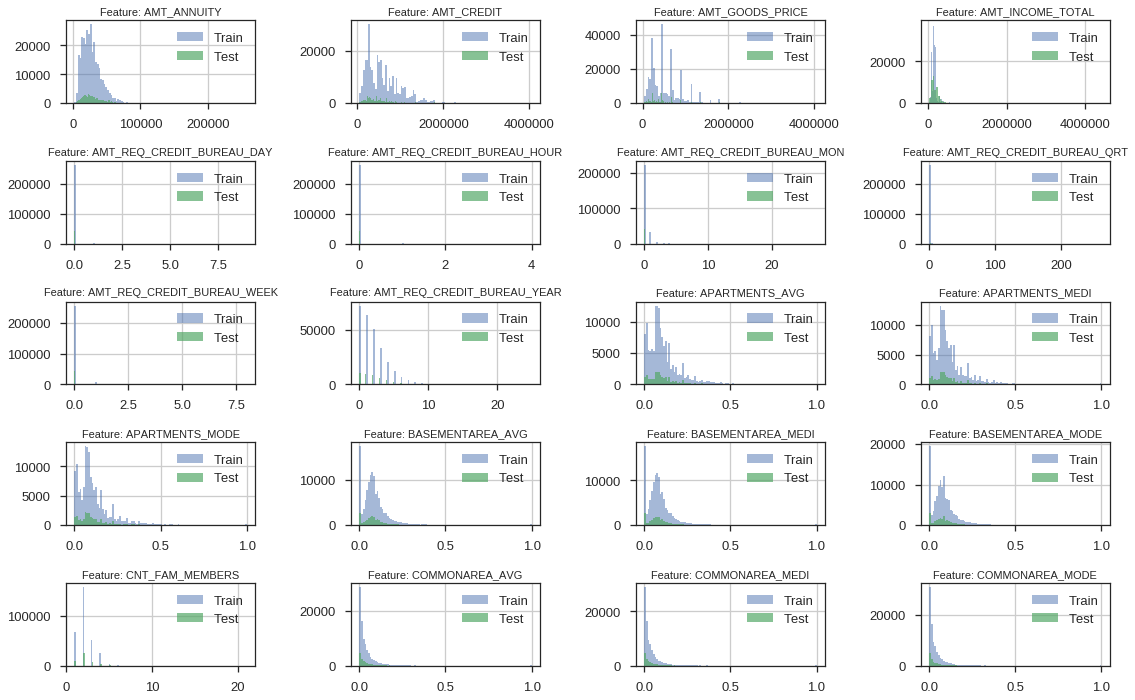

In [60]:
plt.figure(figsize=(16, 10))

for i in range(1, 21):
    plt.subplot(5, 4, i)
    
    mask = (data.TARGET.notnull())
    
    if float_cols[i - 1] == 'AMT_INCOME_TOTAL':
        data.loc[mask & (data.AMT_INCOME_TOTAL < 1e6), float_cols[i-1]].hist(bins=100, alpha=.5, label='Train')
        data.loc[~mask, float_cols[i-1]].hist(bins=100, alpha=.7, label='Test')
    else:
        data.loc[mask, float_cols[i-1]].hist(bins=100, alpha=.5, label='Train')
        data.loc[~mask, float_cols[i-1]].hist(bins=100, alpha=.7, label='Test')
    
    plt.title('Feature: {}'.format(float_cols[i - 1]), fontsize=11)
    plt.legend(loc='best')
    
plt.tight_layout();

Some of the features are integer valued features which appear as floating point valued because of the presence of missing values.

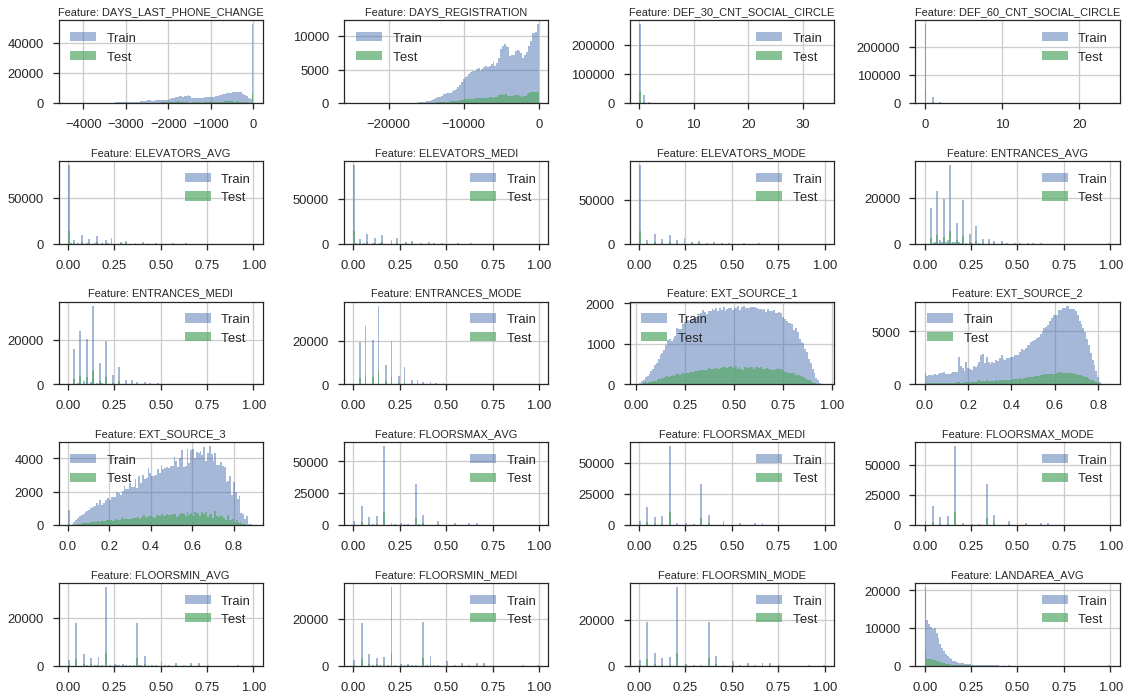

In [61]:
plt.figure(figsize=(16, 10))

for i in range(1, 21):
    plt.subplot(5, 4, i)
    
    mask = (data.TARGET.notnull())
    data.loc[mask, float_cols[(20+i)-1]].hist(bins=100, alpha=.5, label='Train')
    data.loc[~mask, float_cols[(20+i)-1]].hist(bins=100, alpha=.7, label='Test')    
    
    plt.title('Feature: {}'.format(float_cols[(20+i) - 1]), fontsize=11)
    plt.legend(loc='best')
    
plt.tight_layout();

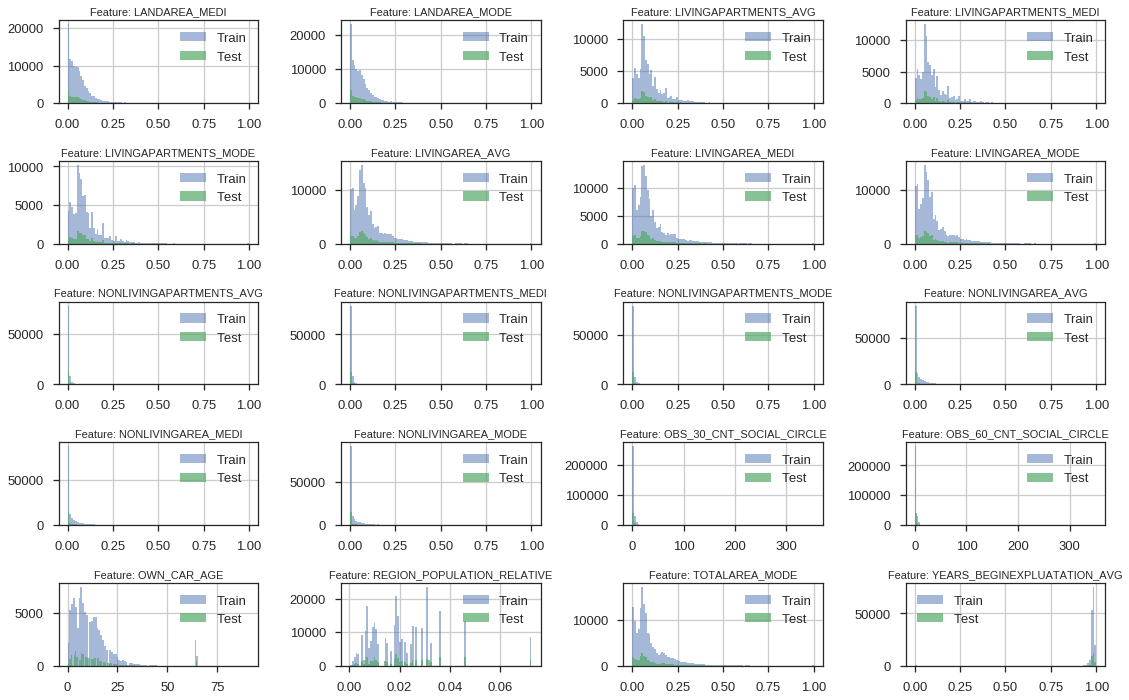

In [62]:
plt.figure(figsize=(16, 10))

for i in range(1, 21):
    plt.subplot(5, 4, i)
    
    mask = (data.TARGET.notnull())
    data.loc[mask, float_cols[(40+i)-1]].hist(bins=100, alpha=.5, label='Train')
    data.loc[~mask, float_cols[(40+i)-1]].hist(bins=100, alpha=.7, label='Test')    
    
    plt.title('Feature: {}'.format(float_cols[(40+i) - 1]), fontsize=11)
    plt.legend(loc='best')
    
plt.tight_layout();

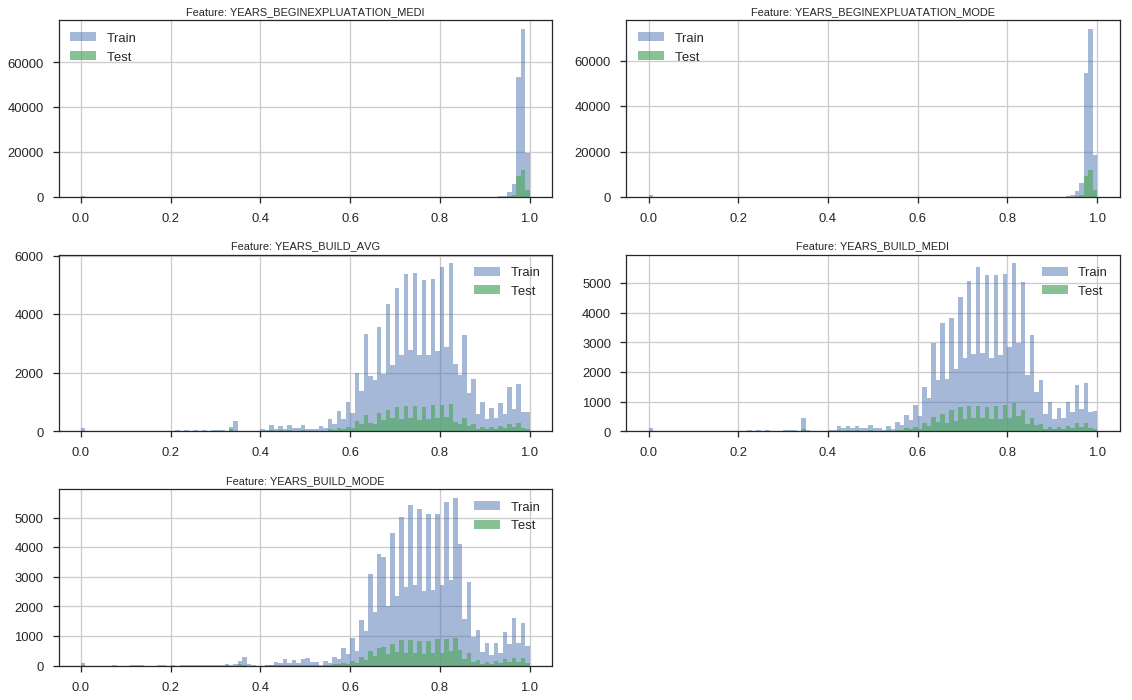

In [63]:
plt.figure(figsize=(16, 10))

for i in range(1, 6):
    plt.subplot(3, 2, i)
    
    mask = (data.TARGET.notnull())
    data.loc[mask, float_cols[(60+i)-1]].hist(bins=100, alpha=.5, label='Train')
    data.loc[~mask, float_cols[(60+i)-1]].hist(bins=100, alpha=.7, label='Test')    
    
    plt.title('Feature: {}'.format(float_cols[(60+i) - 1]), fontsize=11)
    plt.legend(loc='best')
    
plt.tight_layout();

#### Floating point valued features ( FALSE, TRUE )

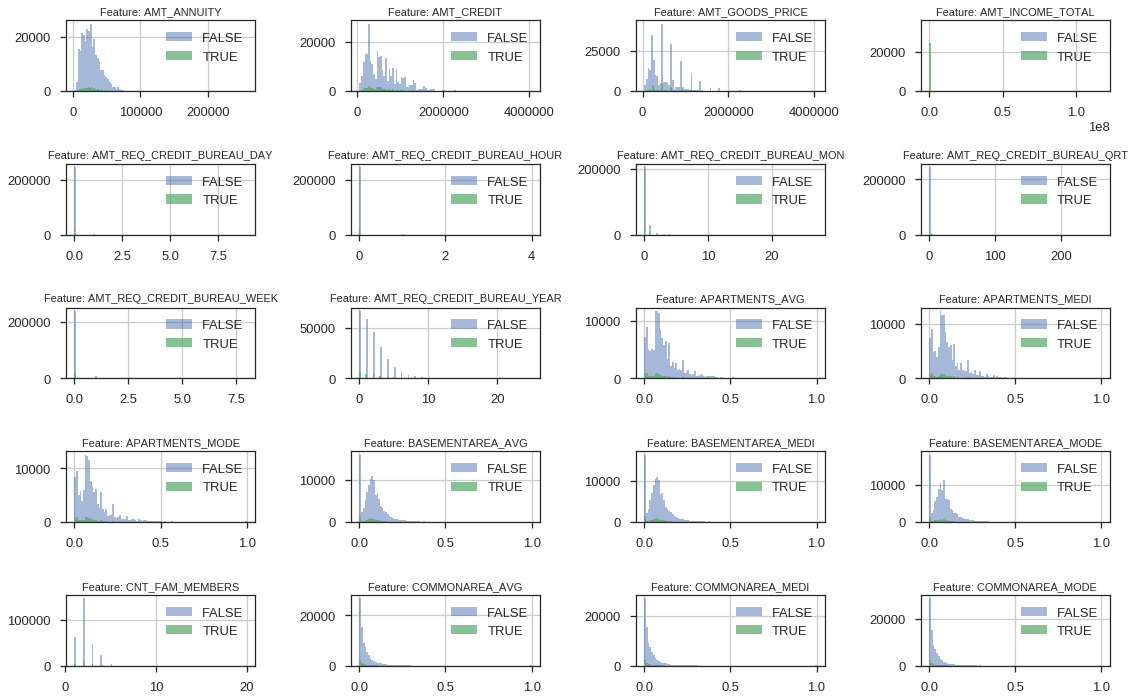

In [65]:
plt.figure(figsize=(16, 10))

for i in range(1, 21):
    plt.subplot(5, 4, i)
    
    mask = (app_train.TARGET == 0)
    
    if float_cols[i - 1] == 'AMT_INCOME_TOTAL':
        app_train.loc[mask & (app_train.AMT_INCOME_TOTAL < 1e6), float_cols[i-1]].hist(bins=100, alpha=.5, label='FALSE')
        app_train.loc[~mask, float_cols[i-1]].hist(bins=100, alpha=.7, label='TRUE')
    else:
        app_train.loc[mask, float_cols[i-1]].hist(bins=100, alpha=.5, label='FALSE')
        app_train.loc[~mask, float_cols[i-1]].hist(bins=100, alpha=.7, label='TRUE')
    
    plt.title('Feature: {}'.format(float_cols[i - 1]), fontsize=11)
    plt.legend(loc='best')
    
plt.tight_layout();

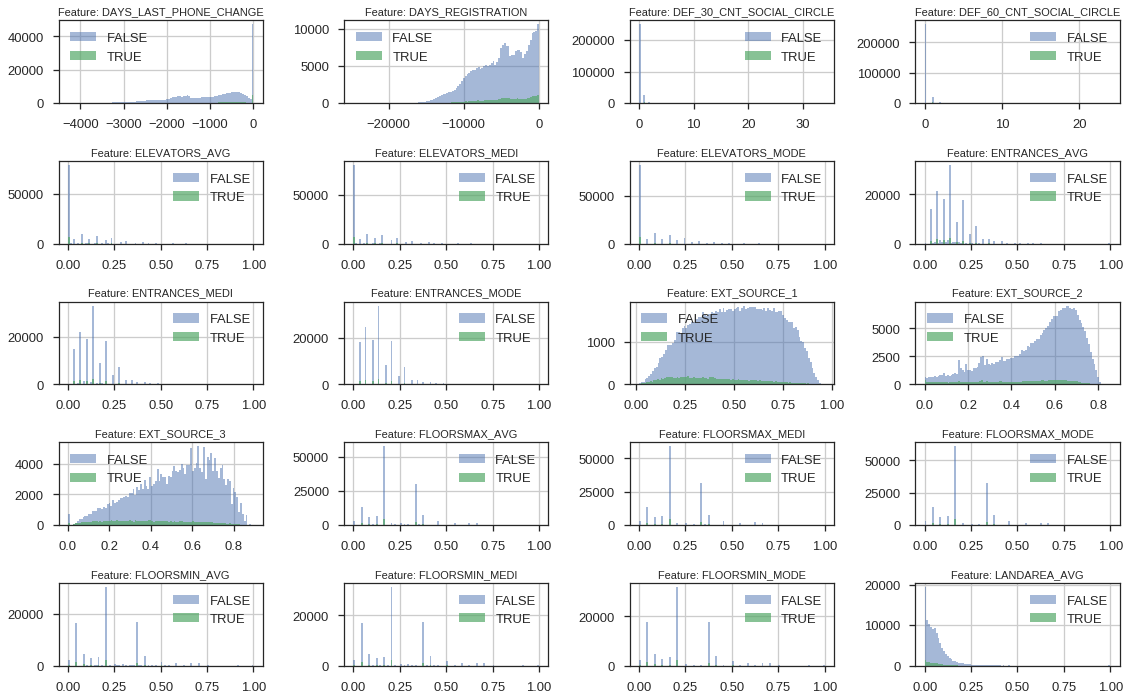

In [5]:
plt.figure(figsize=(16, 10))

OFFSET = 20

for i in range(1, 21):
    plt.subplot(5, 4, i)
    
    mask = (app_train.TARGET == 0)
    
    app_train.loc[mask, float_cols[(OFFSET + i)-1]].hist(bins=100, alpha=.5, label='FALSE')
    app_train.loc[~mask, float_cols[(OFFSET + i)-1]].hist(bins=100, alpha=.7, label='TRUE')
    
    plt.title('Feature: {}'.format(float_cols[(OFFSET + i) - 1]), fontsize=11)
    plt.legend(loc='best')
    
plt.tight_layout();

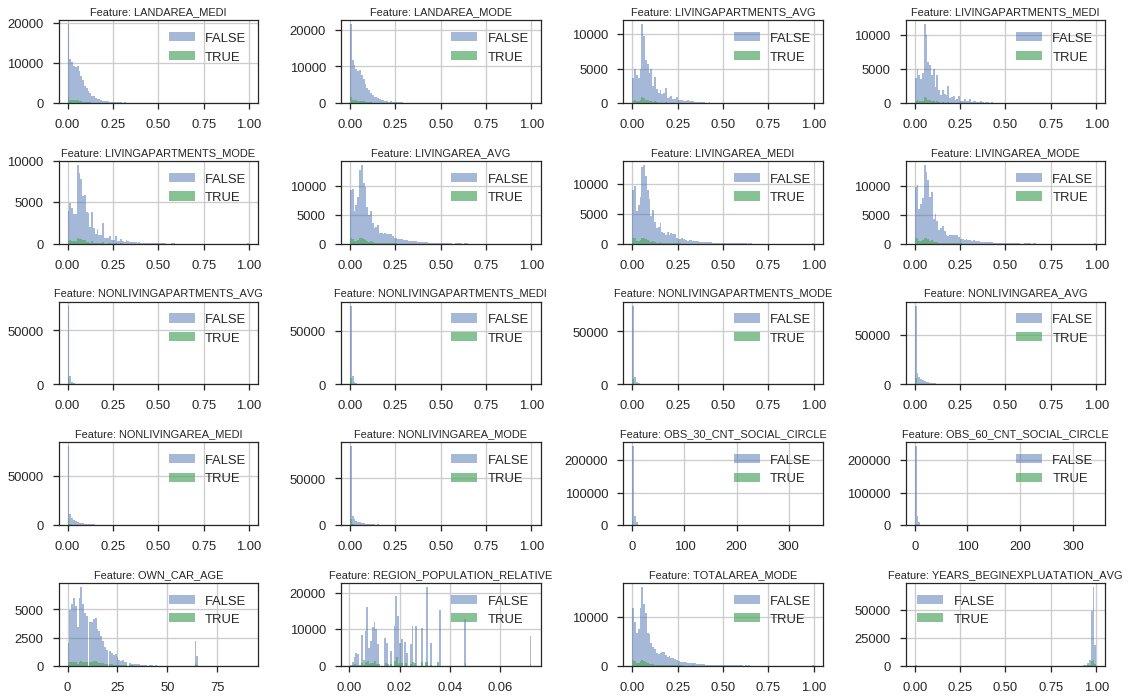

In [6]:
plt.figure(figsize=(16, 10))

OFFSET = 40

for i in range(1, 21):
    plt.subplot(5, 4, i)
    
    mask = (app_train.TARGET == 0)
    
    app_train.loc[mask, float_cols[(OFFSET + i)-1]].hist(bins=100, alpha=.5, label='FALSE')
    app_train.loc[~mask, float_cols[(OFFSET + i)-1]].hist(bins=100, alpha=.7, label='TRUE')
    
    plt.title('Feature: {}'.format(float_cols[(OFFSET + i) - 1]), fontsize=11)
    plt.legend(loc='best')
    
plt.tight_layout();

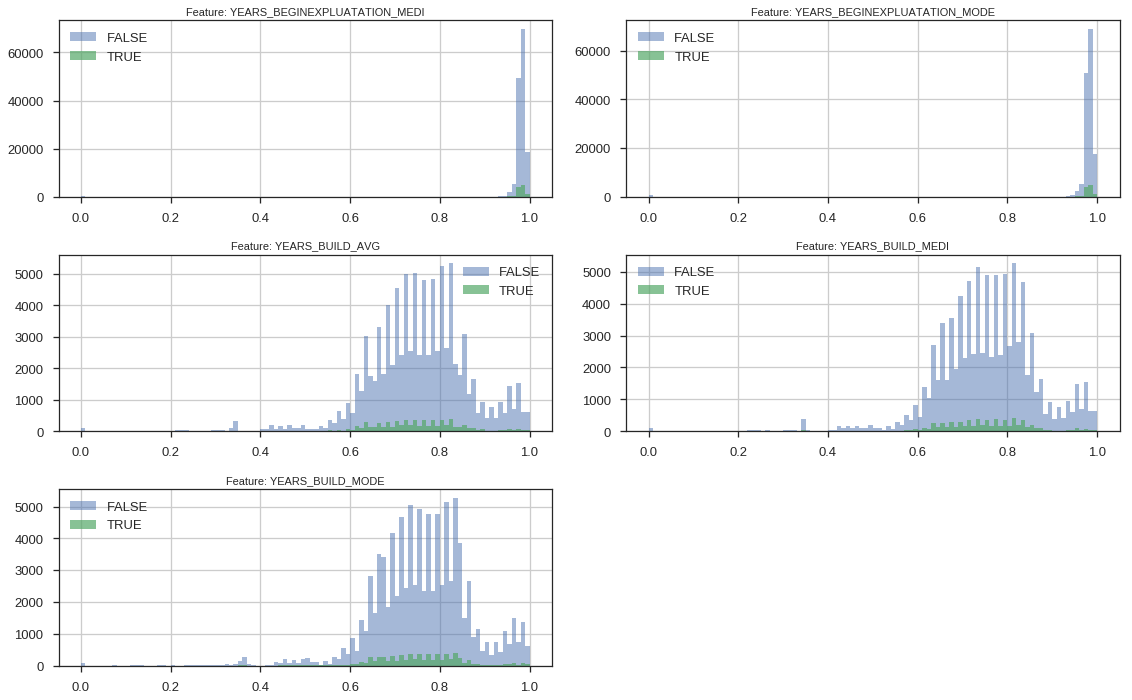

In [7]:
plt.figure(figsize=(16, 10))

OFFSET = 60

for i in range(1, 6):
    plt.subplot(3, 2, i)
    
    mask = (app_train.TARGET == 0)
    
    app_train.loc[mask, float_cols[(OFFSET + i)-1]].hist(bins=100, alpha=.5, label='FALSE')
    app_train.loc[~mask, float_cols[(OFFSET + i)-1]].hist(bins=100, alpha=.7, label='TRUE')
    
    plt.title('Feature: {}'.format(float_cols[(OFFSET + i) - 1]), fontsize=11)
    plt.legend(loc='best')
    
plt.tight_layout();

#### Weight Of Evidence

For both categorical and numerical variables.

- Check if data is continuous or categorical.
- For continuous data, create bins.
- Calculate number of non-events and events in every bin.
- Calculate WOE by taking natural log of division of percentage of non events and events.

In [9]:
def woe(df, f):
    print('Number of unique values: {}'.format(df[f].nunique()))
    
    if df.loc[:, f].nunique() <= 10:
        # categorical
        feature_with_missing = pd.factorize(df[f])[0]
        
        grouped       = df.groupby([feature_with_missing, 'TARGET']).size().unstack().fillna(0)
        grouped_share = grouped / grouped.sum()
        
        woe = grouped_share.apply(lambda x: np.log(x[0.0] / x[1.0]), axis=1)
        iv  = grouped_share.apply(lambda x: x[0] - x[1], axis=1) * woe.values
        
        return f, iv.sum() 
    else:
        # feature bins
        feature_binned = pd.cut(df[f], bins=10, labels=np.arange(10))
        
        grouped       = df.groupby([feature_binned, 'TARGET']).size().unstack().fillna(0)
        grouped_share = grouped / grouped.sum()
        
        woe = grouped_share.apply(lambda x: np.log(x[0.0] / x[1.0]), axis=1)
        iv  = grouped_share.apply(lambda x: x[0] - x[1], axis=1) * woe.values
        
        return f, iv.sum()

In [147]:
# Iterate over every feature and find out which features having non-infinite information value
# and store information value of those.

feat_iv = {}
for col in app_train.columns.drop(['TARGET']):
    f, iv = woe(app_train, col)
    
    if pd.notnull(iv) and (not np.isinf(iv)):
        feat_iv[f] = iv

Number of unique values: 13672
Number of unique values: 5603
Number of unique values: 1002
Number of unique values: 2548
Number of unique values: 9
Number of unique values: 5
Number of unique values: 24
Number of unique values: 11
Number of unique values: 9
Number of unique values: 25
Number of unique values: 2339
Number of unique values: 1148
Number of unique values: 760
Number of unique values: 3780
Number of unique values: 3772
Number of unique values: 3841
Number of unique values: 15
Number of unique values: 17
Number of unique values: 3
Number of unique values: 3181
Number of unique values: 3202
Number of unique values: 3128
Number of unique values: 256
Number of unique values: 12574
Number of unique values: 6168
Number of unique values: 3773
Number of unique values: 15688
Number of unique values: 10
Number of unique values: 9
Number of unique values: 257
Number of unique values: 46
Number of unique values: 26
Number of unique values: 3
Number of unique values: 285
Number of uniqu

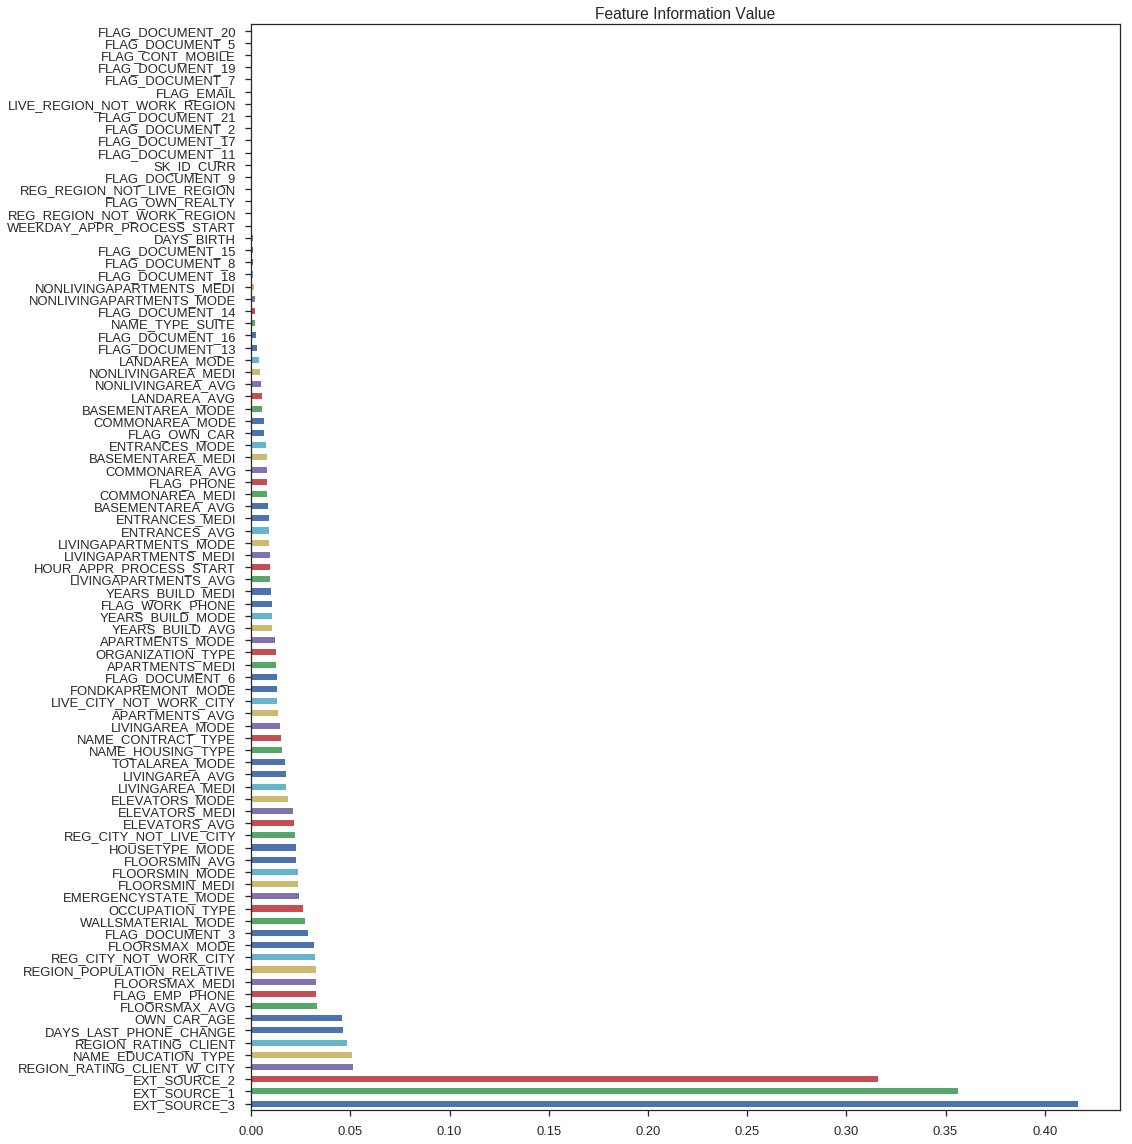

In [155]:
plt.figure(figsize=(16, 16))
pd.Series(feat_iv).sort_values(ascending=False).plot(kind='barh')
plt.tight_layout()
plt.title('Feature Information Value');

#### Integer valued features

In [157]:
int_valued_features = [f for f in app_train.select_dtypes(include=['int8']).columns if app_train[f].nunique() > 2]
print(int_valued_features)

['CNT_CHILDREN', 'CODE_GENDER', 'DAYS_BIRTH', 'EMERGENCYSTATE_MODE', 'FONDKAPREMONT_MODE', 'HOUR_APPR_PROCESS_START', 'HOUSETYPE_MODE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WALLSMATERIAL_MODE', 'WEEKDAY_APPR_PROCESS_START']


In [158]:
pd.crosstab(app_train.CNT_CHILDREN, 
            app_train.TARGET)

TARGET,0.0,1.0
CNT_CHILDREN,,
0,198762,16609
1,55665,5454
2,24416,2333
3,3359,358
4,374,55
5,77,7
6,15,6
7,7,0
8,2,0


In [160]:
df_temp  = app_train.loc[:, ['CNT_CHILDREN', 'TARGET']]
df_temp.loc[df_temp.CNT_CHILDREN > 5, 'CNT_CHILDREN'] = 5

woe(df_temp, 'CNT_CHILDREN')

Number of unique values: 6


('CNT_CHILDREN', 0.005909712740653296)

There is an opportunity to merge together multiple categories.

In [166]:
df_temp  = app_train.loc[:, ['EMERGENCYSTATE_MODE', 'TARGET']]

woe(df_temp, 'EMERGENCYSTATE_MODE')

Number of unique values: 3


('EMERGENCYSTATE_MODE', 0.024043969836770995)

In [168]:
pd.crosstab(app_train.loc[:, 'FONDKAPREMONT_MODE'], app_train.TARGET)

TARGET,0.0,1.0
FONDKAPREMONT_MODE,,
-1,192170,18125
0,68678,5152
1,5292,327
2,11288,792
3,5258,429


In [169]:
df_temp  = app_train.loc[:, ['FONDKAPREMONT_MODE', 'TARGET']]
woe(df_temp, 'FONDKAPREMONT_MODE')

Number of unique values: 5


('FONDKAPREMONT_MODE', 0.013021139665071567)

In [170]:
pd.crosstab(app_train.loc[:, 'NAME_EDUCATION_TYPE'], app_train.TARGET)

TARGET,0.0,1.0
NAME_EDUCATION_TYPE,,
0,198867,19524
1,70854,4009
2,9405,872
3,3399,417
4,161,3


In [171]:
df_temp  = app_train.loc[:, ['NAME_EDUCATION_TYPE', 'TARGET']]
woe(df_temp, 'NAME_EDUCATION_TYPE')

Number of unique values: 5


('NAME_EDUCATION_TYPE', 0.05083554290147044)

In [172]:
pd.crosstab(app_train.loc[:, 'NAME_INCOME_TYPE'], app_train.TARGET)

TARGET,0.0,1.0
NAME_INCOME_TYPE,,
0,143550,15224
1,20454,1249
2,66257,5360
3,52380,2982
4,14,8
5,18,0
6,10,0
7,3,2


In [175]:
df_temp  = app_train.loc[:, ['NAME_INCOME_TYPE', 'TARGET']]
df_temp.loc[df_temp.NAME_INCOME_TYPE > 4, 'NAME_INCOME_TYPE'] = 4

woe(df_temp, 'NAME_INCOME_TYPE')

Number of unique values: 5


('NAME_INCOME_TYPE', 0.057896106859146104)

There is an opportunity to merge together multiple categories.

In [12]:
df_temp = app_train.loc[:, ['NAME_TYPE_SUITE', 'TARGET']]

woe(df_temp, 'NAME_TYPE_SUITE')

Number of unique values: 8


('NAME_TYPE_SUITE', 0.0020859976720665136)

In [13]:
df_temp = app_train.loc[:, ['OCCUPATION_TYPE', 'TARGET']]

woe(df_temp, 'OCCUPATION_TYPE')

Number of unique values: 19


('OCCUPATION_TYPE', 0.02633245266361635)

In [14]:
df_temp = app_train.loc[:, ['ORGANIZATION_TYPE', 'TARGET']]

woe(df_temp, 'ORGANIZATION_TYPE')

Number of unique values: 58


('ORGANIZATION_TYPE', 0.012604422229912376)

In [15]:
df_temp = app_train.loc[:, ['REGION_RATING_CLIENT', 'TARGET']]

woe(df_temp, 'REGION_RATING_CLIENT')

Number of unique values: 3


('REGION_RATING_CLIENT', 0.04831690185425047)

In [16]:
df_temp = app_train.loc[:, ['REGION_RATING_CLIENT_W_CITY', 'TARGET']]

woe(df_temp, 'REGION_RATING_CLIENT_W_CITY')

Number of unique values: 3


('REGION_RATING_CLIENT_W_CITY', 0.05120149755009072)

In [17]:
df_temp = app_train.loc[:, ['WALLSMATERIAL_MODE', 'TARGET']]

woe(df_temp, 'WALLSMATERIAL_MODE')

Number of unique values: 8


('WALLSMATERIAL_MODE', 0.027366576592694657)

In [18]:
df_temp = app_train.loc[:, ['WEEKDAY_APPR_PROCESS_START', 'TARGET']]

woe(df_temp, 'WEEKDAY_APPR_PROCESS_START')

Number of unique values: 7


('WEEKDAY_APPR_PROCESS_START', 0.000676688845853548)

#### Relationship between Credit Scores from External Sources

In [20]:
app_train.loc[:, ['EXT_SOURCE_1', 
                  'EXT_SOURCE_2',
                  'EXT_SOURCE_3'
                 ]].corr()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
EXT_SOURCE_1,1.000000,0.213982,0.186846
EXT_SOURCE_2,0.213982,1.000000,0.109167
EXT_SOURCE_3,0.186846,0.109167,1.000000


#### Relationship between AMT_INCOME_TOTAL and AMT_CREDIT

In [22]:
app_train.loc[:, ['AMT_INCOME_TOTAL', 'AMT_CREDIT']].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT
AMT_INCOME_TOTAL,1.00000,0.15687
AMT_CREDIT,0.15687,1.00000


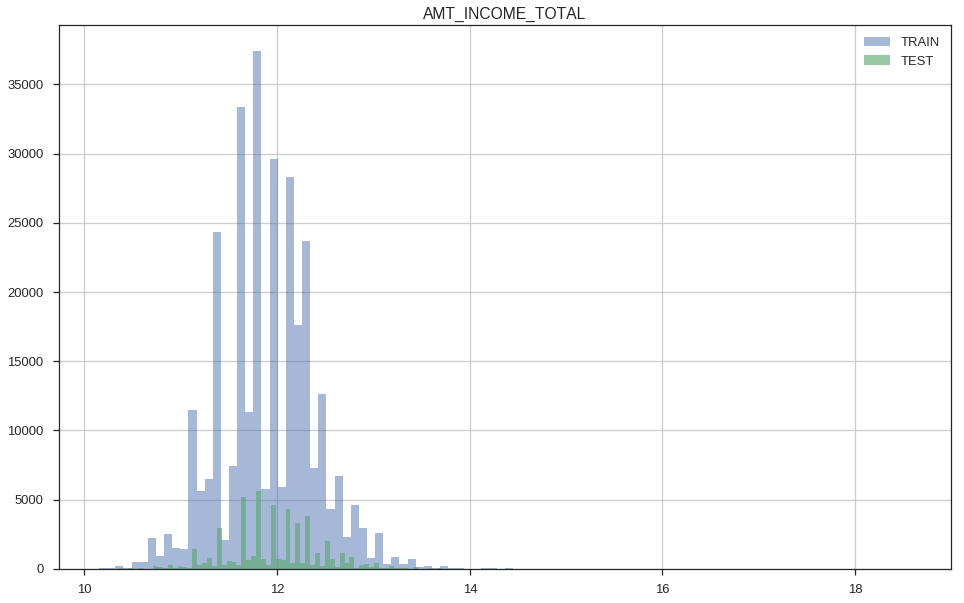

In [28]:
plt.figure(figsize=(16, 10))

app_train.loc[:, 'AMT_INCOME_TOTAL'].map(np.log1p).hist(bins=100, alpha=.5, label='TRAIN')
app_test.loc[:, 'AMT_INCOME_TOTAL'].map(np.log1p).hist(bins=100, alpha=.6, label='TEST')
plt.title('AMT_INCOME_TOTAL')
plt.legend(loc='best');

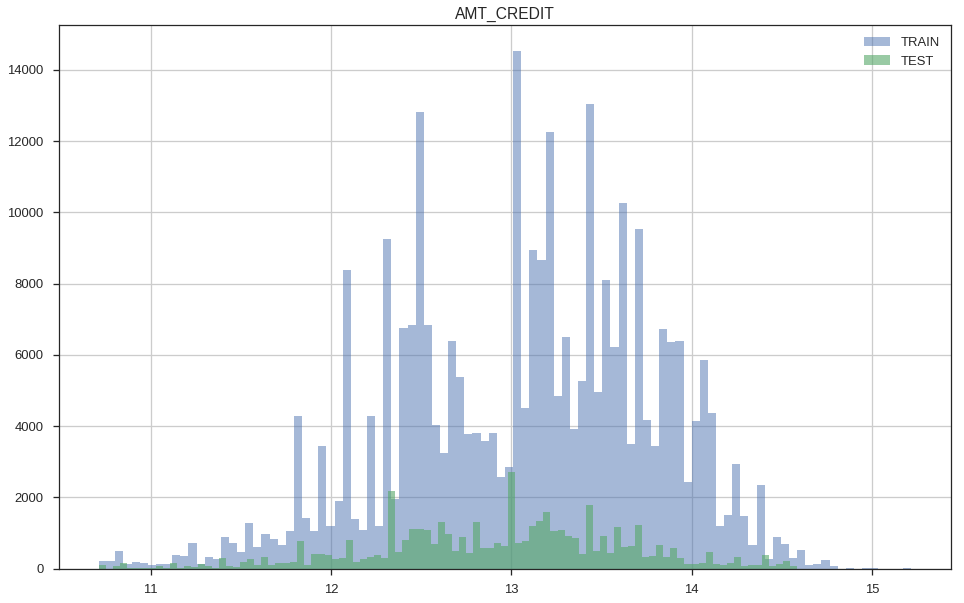

In [29]:
plt.figure(figsize=(16, 10))

app_train.loc[:, 'AMT_CREDIT'].map(np.log1p).hist(bins=100, alpha=.5, label='TRAIN')
app_test.loc[:, 'AMT_CREDIT'].map(np.log1p).hist(bins=100, alpha=.6, label='TEST')
plt.title('AMT_CREDIT')
plt.legend(loc='best');

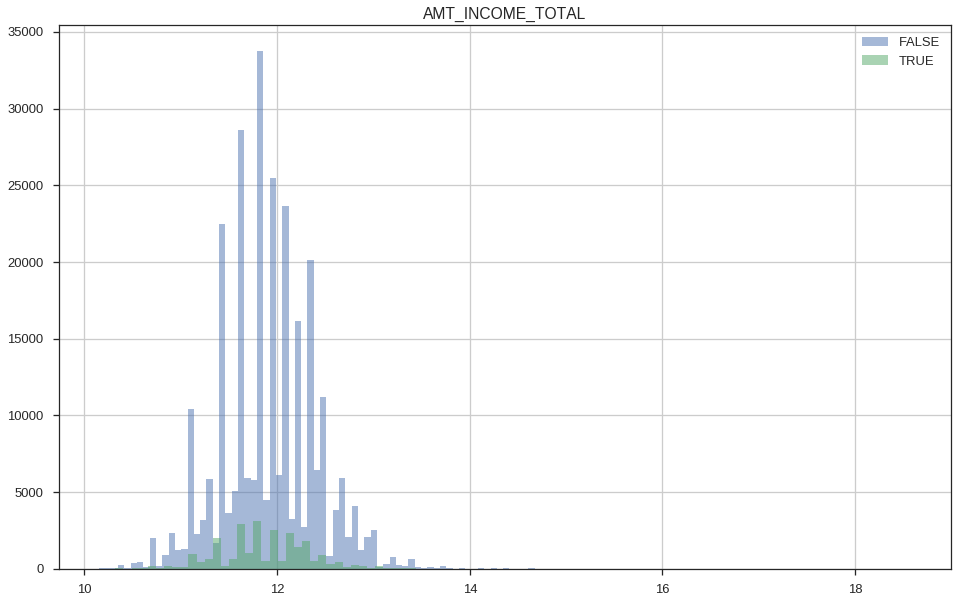

In [35]:
plt.figure(figsize=(16, 10))

app_train.loc[(app_train.TARGET == 0), 'AMT_INCOME_TOTAL'].map(np.log1p).hist(bins=100, alpha=.5, label='FALSE')
app_train.loc[(app_train.TARGET == 1), 'AMT_INCOME_TOTAL'].map(np.log1p).hist(bins=100, alpha=.5, label='TRUE')
plt.title('AMT_INCOME_TOTAL')
plt.legend(loc='best');

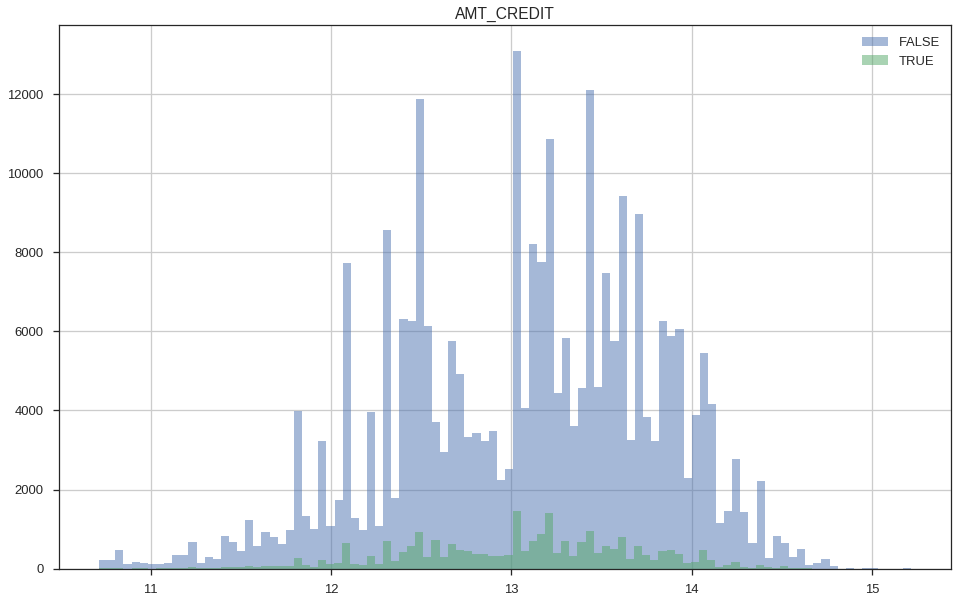

In [33]:
plt.figure(figsize=(16, 10))

app_train.loc[(app_train.TARGET == 0), 'AMT_CREDIT'].map(np.log1p).hist(bins=100, alpha=.5, label='FALSE')
app_train.loc[(app_train.TARGET == 1), 'AMT_CREDIT'].map(np.log1p).hist(bins=100, alpha=.5, label='TRUE')
plt.title('AMT_CREDIT')
plt.legend(loc='best');

In [11]:
app_train['AMT_CREDIT'].value_counts().iloc[:10]

450000.0    9709
675000.0    8877
225000.0    8162
180000.0    7342
270000.0    7241
900000.0    6246
254700.0    4500
545040.0    4437
808650.0    4152
135000.0    3660
Name: AMT_CREDIT, dtype: int64

In [12]:
app_train['AMT_INCOME_TOTAL'].value_counts().iloc[:10]

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
225000.0    20698
202500.0    16341
67500.0     11147
270000.0    10827
81000.0      6001
Name: AMT_INCOME_TOTAL, dtype: int64

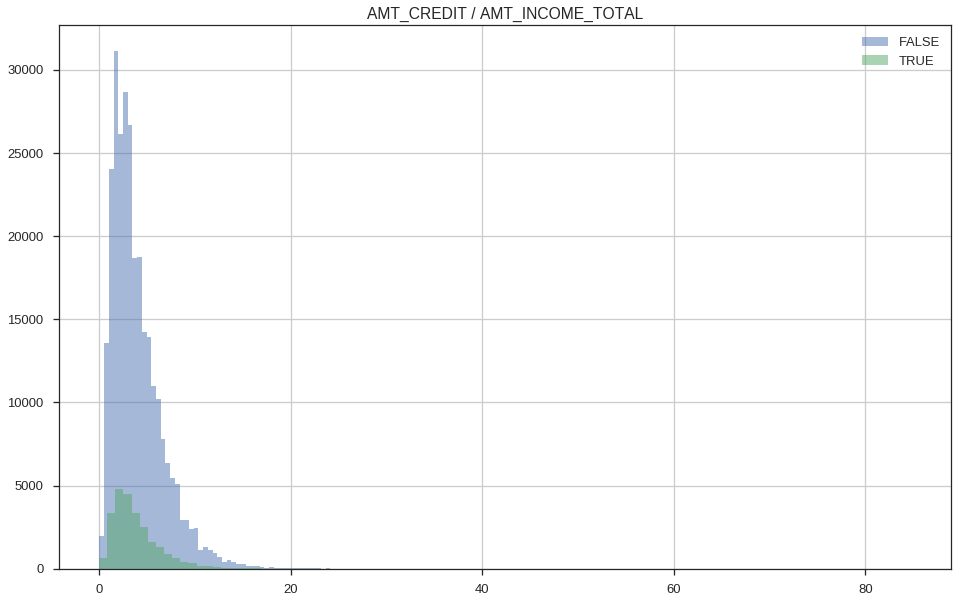

In [42]:
ratio_ = app_train.loc[:, 'AMT_CREDIT'] / app_train.loc[:, 'AMT_INCOME_TOTAL']

plt.figure(figsize=(16, 10))

ratio_.loc[(app_train.TARGET == 0)].hist(bins=100, alpha=.5, label='FALSE')
ratio_.loc[(app_train.TARGET == 1)].hist(bins=100, alpha=.5, label='TRUE')
plt.title('AMT_CREDIT / AMT_INCOME_TOTAL')
plt.legend(loc='best');

#### Relationship between AMT_ANNUITY and AMT_INCOME_TOTAL

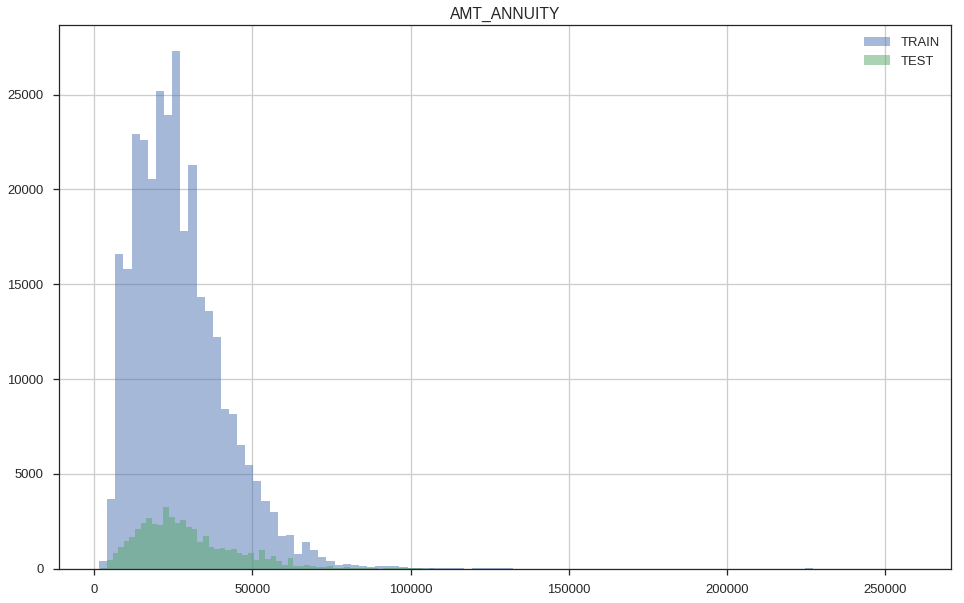

In [16]:
plt.figure(figsize=(16, 10))

app_train['AMT_ANNUITY'].hist(bins=100, alpha=.5, label='TRAIN')
app_test['AMT_ANNUITY'].hist(bins=100, alpha=.5, label='TEST')

plt.title('AMT_ANNUITY')
plt.legend(loc='best');

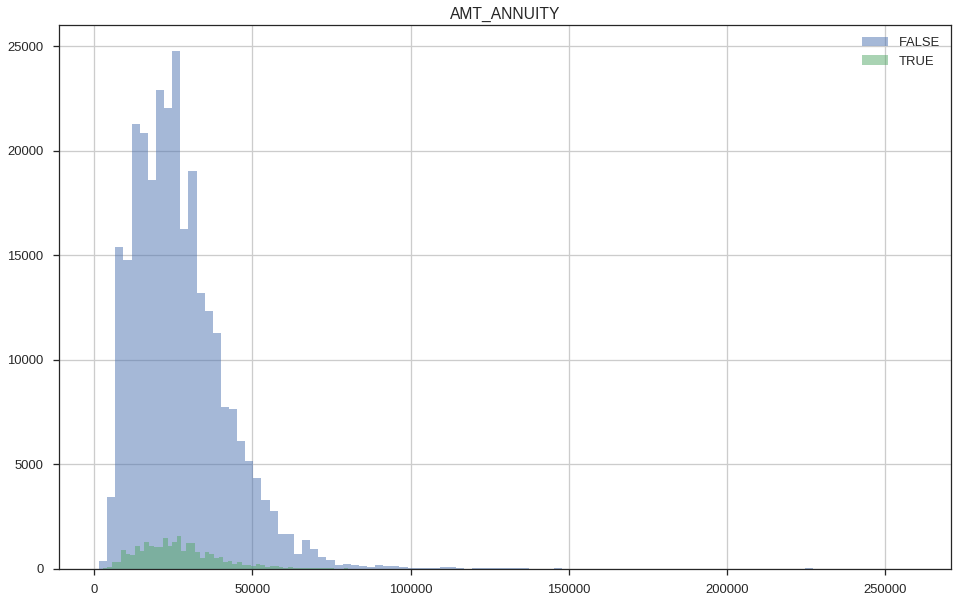

In [17]:
plt.figure(figsize=(16, 10))

app_train.loc[(app_train.TARGET == 0), 'AMT_ANNUITY'].hist(bins=100, alpha=.5, label='FALSE')
app_train.loc[(app_train.TARGET == 1), 'AMT_ANNUITY'].hist(bins=100, alpha=.5, label='TRUE')

plt.title('AMT_ANNUITY')
plt.legend(loc='best');

In [19]:
app_train.loc[(app_train.AMT_INCOME_TOTAL < 1e6), ['AMT_ANNUITY', 'AMT_INCOME_TOTAL']].corr()

,AMT_ANNUITY,AMT_INCOME_TOTAL
AMT_ANNUITY,1.00000,0.47344
AMT_INCOME_TOTAL,0.47344,1.00000


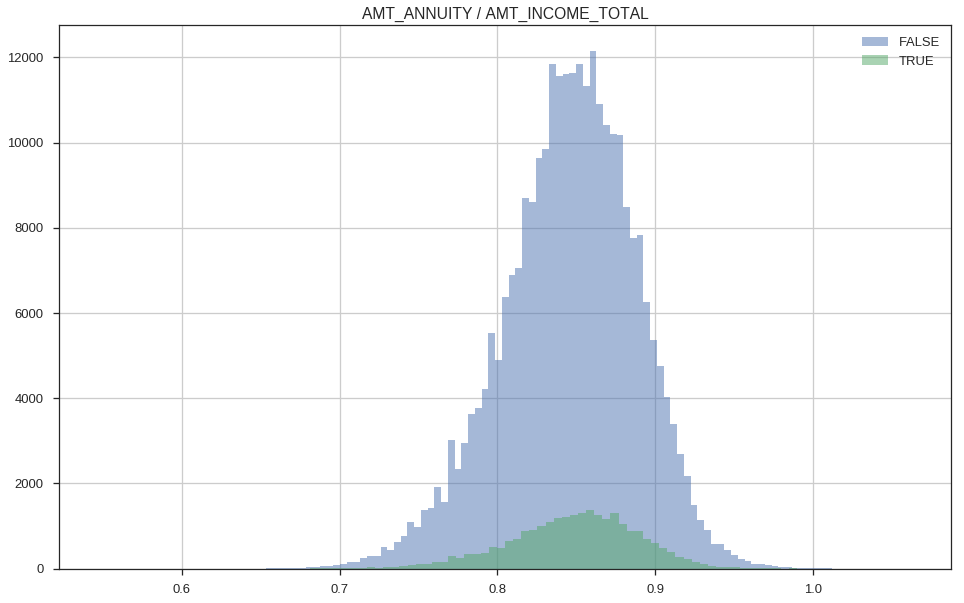

In [22]:
ratio_ = app_train.loc[:, 'AMT_ANNUITY'].map(np.log1p) / app_train.loc[:, 'AMT_INCOME_TOTAL'].map(np.log1p)

plt.figure(figsize=(16, 10))
ratio_.loc[(app_train.TARGET == 0)].hist(bins=100, alpha=.5, label='FALSE')
ratio_.loc[(app_train.TARGET == 1)].hist(bins=100, alpha=.5, label='TRUE')

plt.title('AMT_ANNUITY / AMT_INCOME_TOTAL')
plt.legend(loc='best');

#### Number of missing values in currrent loan application

In [27]:
%%time

num_missing_values = app_train.loc[:, app_train.columns.drop('TARGET')]\
                              .apply(lambda x: np.sum(pd.isnull(x)), axis=1)

CPU times: user 49.8 s, sys: 302 ms, total: 50.2 s
Wall time: 50.1 s


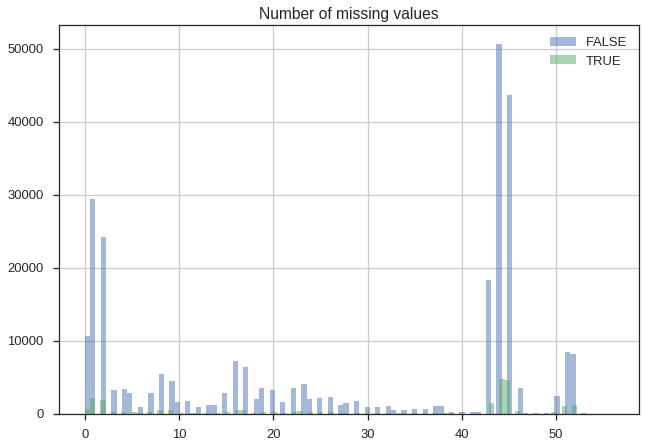

In [28]:
num_missing_values[app_train.TARGET == 0].hist(bins=100, alpha=.5, label='FALSE')
num_missing_values[app_train.TARGET == 1].hist(bins=100, alpha=.5, label='TRUE')

plt.title('Number of missing values')
plt.legend(loc='best');

#### DAYS_BIRTH - Client's age in days at the time of application 

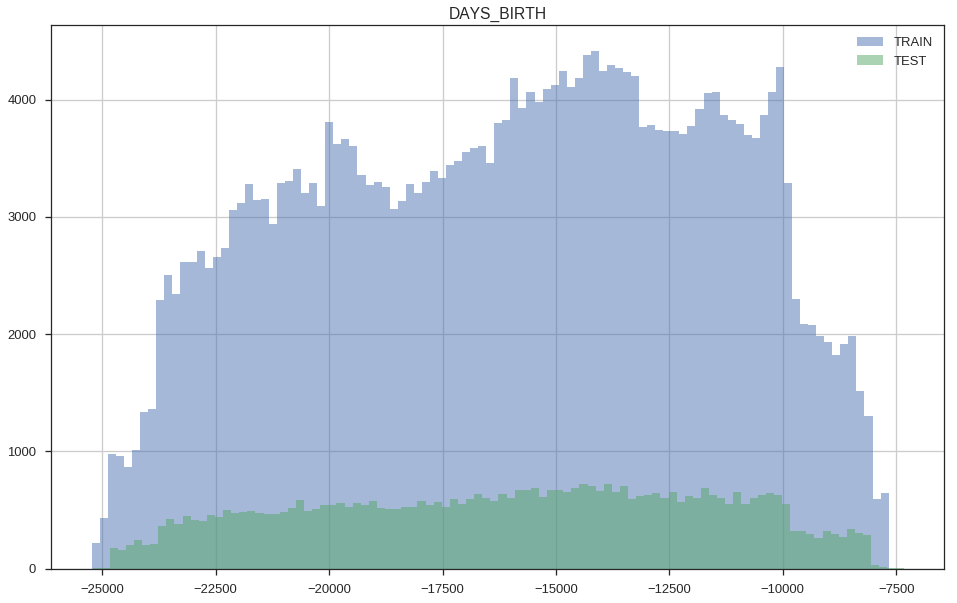

In [4]:
plt.figure(figsize=(16, 10))

app_train.loc[:, 'DAYS_BIRTH'].hist(bins=100, alpha=.5, label='TRAIN')
app_test.loc[:, 'DAYS_BIRTH'].hist(bins=100, alpha=.5, label='TEST')

plt.title('DAYS_BIRTH')
plt.legend(loc='best');

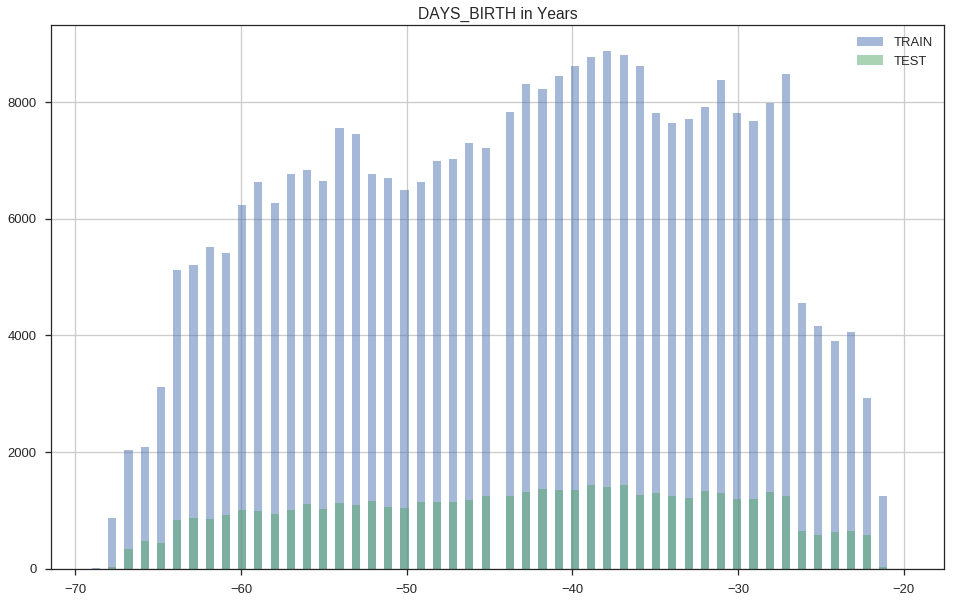

In [7]:
plt.figure(figsize=(16, 10))

(app_train.loc[:, 'DAYS_BIRTH'] / 365).astype(np.int).hist(bins=100, alpha=.5, label='TRAIN')
(app_test.loc[:, 'DAYS_BIRTH'] / 365).astype(np.int).hist(bins=100, alpha=.5, label='TEST')

plt.title('DAYS_BIRTH in Years')
plt.legend(loc='best');

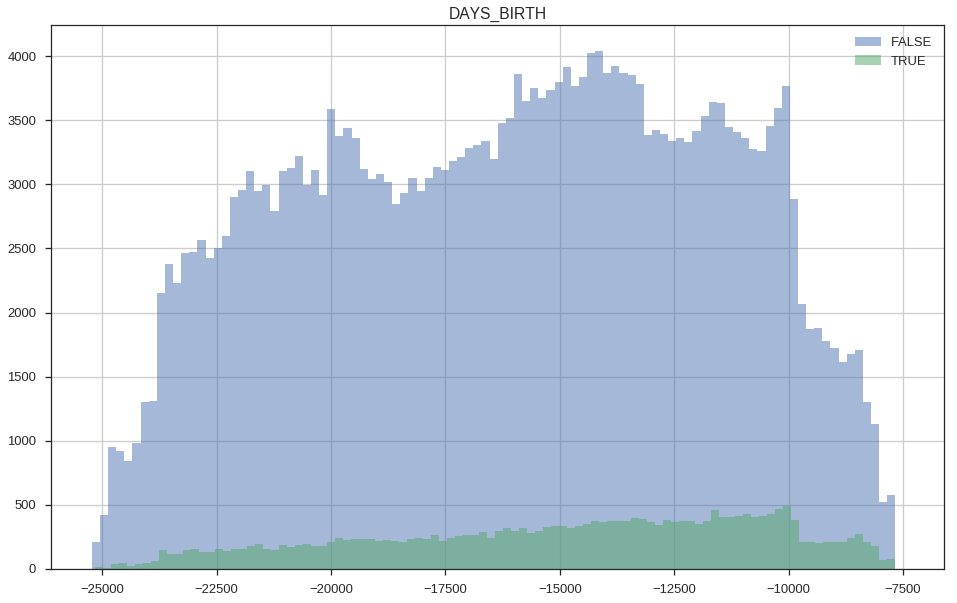

In [8]:
plt.figure(figsize=(16, 10))

app_train.loc[(app_train.TARGET == 0), 'DAYS_BIRTH'].hist(bins=100, alpha=.5, label='FALSE')
app_train.loc[(app_train.TARGET == 1), 'DAYS_BIRTH'].hist(bins=100, alpha=.5, label='TRUE')

plt.title('DAYS_BIRTH')
plt.legend(loc='best');

#### DAYS_EMPLOYED: How many days before the application the person started current employment ?

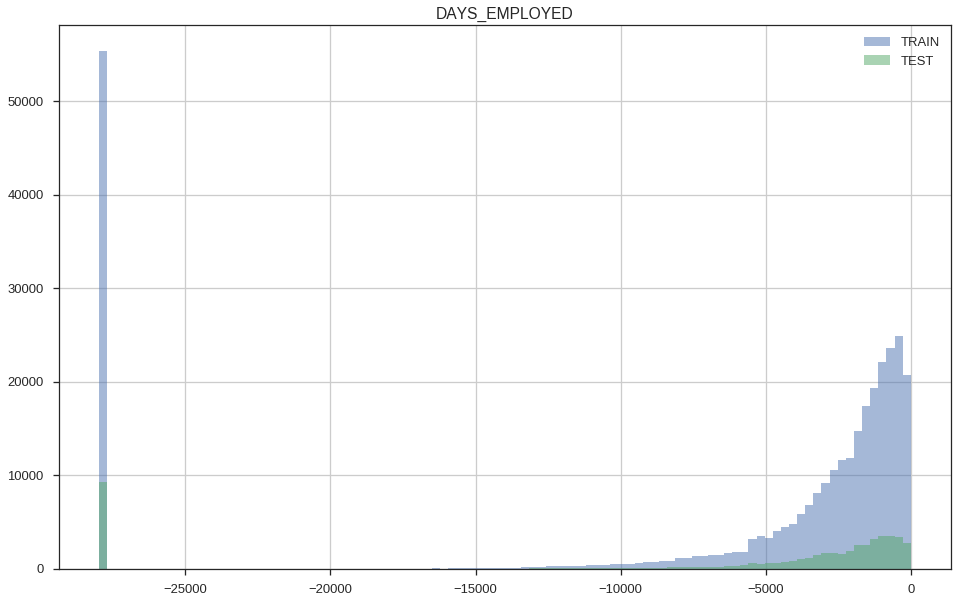

In [34]:
plt.figure(figsize=(16, 10))

app_train.loc[:, 'DAYS_EMPLOYED'].hist(bins=100, alpha=.5, label='TRAIN')
app_test.loc[:, 'DAYS_EMPLOYED'].hist(bins=100, alpha=.5, label='TEST')

plt.title('DAYS_EMPLOYED')
plt.legend(loc='best');

This peak at the left may be because of missing values filled by that number.

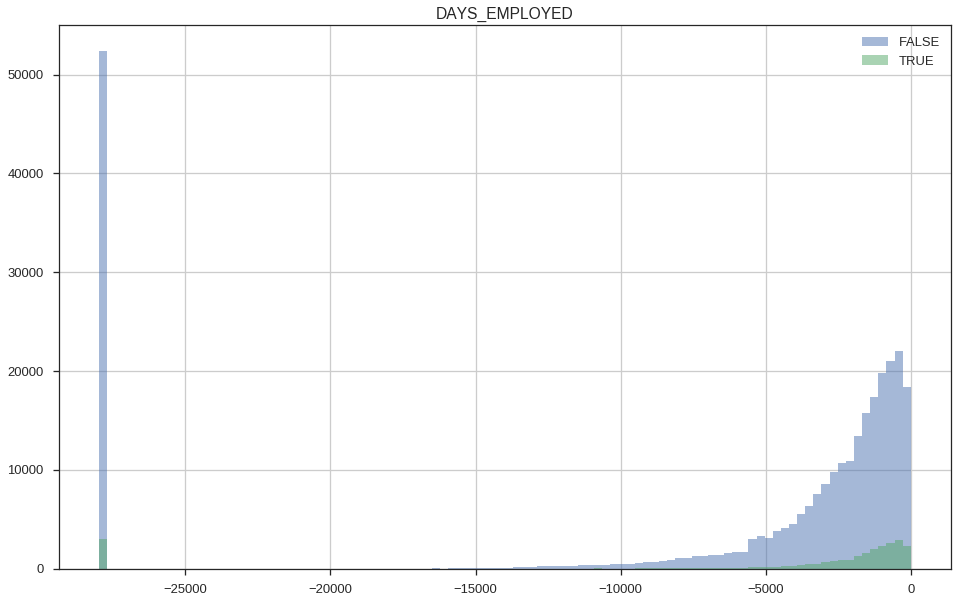

In [35]:
plt.figure(figsize=(16, 10))

app_train.loc[(app_train.TARGET == 0), 'DAYS_EMPLOYED'].hist(bins=100, alpha=.5, label='FALSE')
app_train.loc[(app_train.TARGET == 1), 'DAYS_EMPLOYED'].hist(bins=100, alpha=.5, label='TRUE')

plt.title('DAYS_EMPLOYED')
plt.legend(loc='best');

#### Relationship between DAYS_BIRTH and DAYS_EMPLOYED

In [9]:
app_train.loc[:, ['DAYS_BIRTH', 'DAYS_EMPLOYED']].corr()

,DAYS_BIRTH,DAYS_EMPLOYED
DAYS_BIRTH,1.00000,0.66242
DAYS_EMPLOYED,0.66242,1.00000


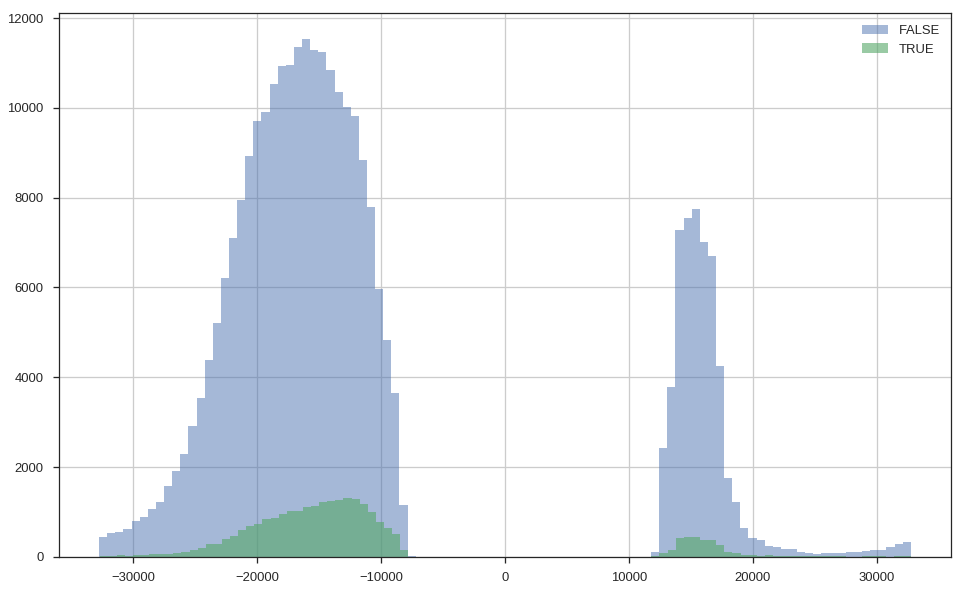

In [14]:
fi = app_train.loc[:, 'DAYS_BIRTH'] + app_train.loc[:, 'DAYS_EMPLOYED']

plt.figure(figsize=(16, 10))

fi[(app_train.TARGET == 0)].hist(bins=100, alpha=.5, label='FALSE')
fi[(app_train.TARGET == 1)].hist(bins=100, alpha=.6, label='TRUE')

plt.legend(loc='best');

#### Relationship between previous credits reported to Credit Bureau before current loan application.

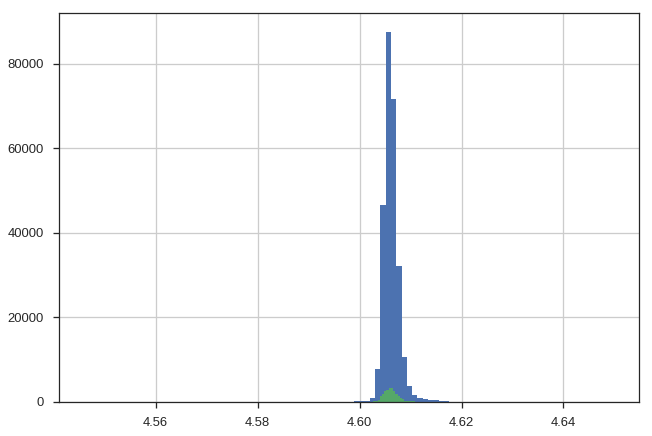

In [25]:
res = (prev_app.AMT_GOODS_PRICE / prev_app.AMT_CREDIT).replace([np.inf, -np.inf])
res = res.groupby(prev_app.SK_ID_CURR).mean()

res  = app_train.SK_ID_CURR.map(res)
rres = (app_train.AMT_GOODS_PRICE / app_train.AMT_CREDIT).replace([np.inf, -np.inf])

res  = res - rres

res[(res.notnull()) & (app_train.TARGET == 0)].map(lambda x: np.log(x + 100)).hist(bins=100)
res[(res.notnull()) & (app_train.TARGET == 1)].map(lambda x: np.log(x + 100)).hist(bins=100);

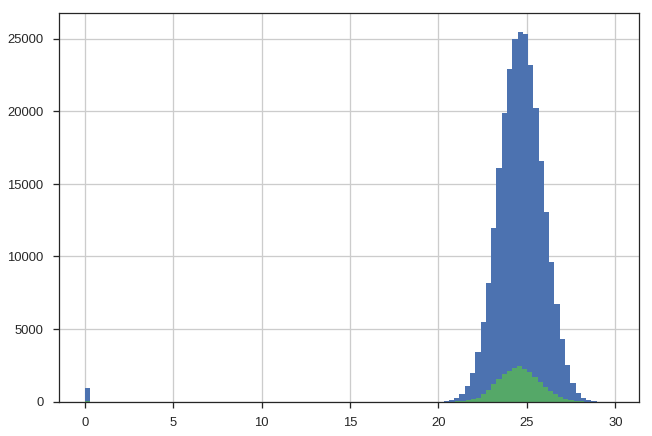

In [29]:
res = (prev_app.AMT_APPLICATION)
res = res.groupby(prev_app.SK_ID_CURR).mean()

res  = app_train.SK_ID_CURR.map(res)
rres = (app_train.AMT_CREDIT)

res  = res * rres

res[(res.notnull()) & (app_train.TARGET == 0)].map(np.log1p).hist(bins=100)
res[(res.notnull()) & (app_train.TARGET == 1)].map(np.log1p).hist(bins=100);

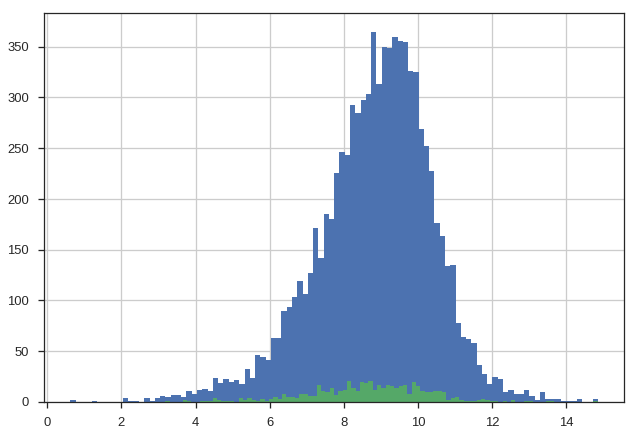

In [42]:
res  = ((prev_app.AMT_DOWN_PAYMENT * prev_app.RATE_DOWN_PAYMENT) - prev_app.AMT_ANNUITY).replace([np.inf, -np.inf])
res  = res.groupby(prev_app.SK_ID_CURR).sum()
res  = app_train.SK_ID_CURR.map(res)
# rres = (app_train.AMT_GOODS_PRICE / app_train.AMT_CREDIT).replace([np.inf, -np.inf])

# res  = res - rres

res[(res.notnull()) & (res > 0) & (app_train.TARGET == 0)].map(np.log1p).hist(bins=100)
res[(res.notnull()) & (res > 0) & (app_train.TARGET == 1)].map(np.log1p).hist(bins=100);